**Part A: GC Content and Sequence Analysis (30 marks)**

**ROUGH CODE**

In [83]:
# Note: 're' is no longer needed for this implementation
# import re

class DNA:

    def __init__(self):
        """
        Initialize the DNA object with:
        - A *set* of valid nucleotides for fast O(1) lookups.
        """
        # A set is much faster for 'in' checks than a list
        self.valid_nucleotides = {"A", "T", "C", "G"}

    def valid_dna(self, seq):
        """
        Validates and cleans a DNA sequence by removing invalid characters.
        Prints a warning for any removed characters.

        Args:
            seq (str): Input DNA sequence.

        Returns:
            str: A new string containing only valid (A, T, C, G) nucleotides.
        """
        # Ensure sequence is uppercase (get_seq already does this, but it's good practice)
        seq = seq.upper()

        clean_seq_chars = []
        for nucleotide in seq:
            if nucleotide in self.valid_nucleotides:
                clean_seq_chars.append(nucleotide)
            elif nucleotide.strip(): # Ignore whitespace, but warn for other chars
                # Only print a warning if the character is not just whitespace
                print(f"Invalid nucleotide found and removed: '{nucleotide}'")

        # Return a clean *string*. This is much more useful and robust.
        return "".join(clean_seq_chars)

    def count_nucleotides(self, seq):
        """
        Counts the total number of nucleotides in a sequence.

        Args:
            seq (str): A validated DNA sequence string.

        Returns:
            int: The total length of the sequence.
        """
        # Just return the number (int), not a formatted string
        return len(seq)

    def gc_content(self, seq):
        """
        Calculates the GC content of a DNA sequence.

        Args:
            seq (str): A validated DNA sequence string.

        Returns:
            float: The GC content as a percentage (e.g., 50.345).
        """
        if not seq:  # Avoid ZeroDivisionError for empty sequences
            return 0.0

        # .count() is fast on strings
        g_count = seq.count("G")
        c_count = seq.count("C")

        gc_val = (g_count + c_count) / len(seq) * 100

        # Return the number (float), not a formatted string
        return round(gc_val, 3)

    def gc_content_subseq(self, seq, k=2):
        """
        Calculates the GC content for non-overlapping sub-sequences.

        Args:
            seq (str): A validated DNA sequence string.
            k (int): The window size for each sub-sequence.

        Returns:
            list: A list of floats, where each float is the GC content
                  of a k-sized sub-sequence.
        """
        res = []
        # Loop over the string in non-overlapping steps of size k
        for i in range(0, len(seq) - k + 1, k):
            subseq = seq[i : i + k]
            # Call our existing gc_content method on the sub-string
            res.append(self.gc_content(subseq))
        return res

In [65]:
import re
import random
def random_seq():
  lis = ["A","T","C","G"]
  return "".join(random.choice(lis) for i in range(10))

seq = random_seq()
seq
dna = DNA()
print(f"The input seq is -:{dna.valid_dna(seq)}")
seq_needed= dna.valid_dna(seq)
print(f"The length of the seq is -: {dna.count_nucleotides(seq)}")
print(f"The g-c content of the seq is -: {dna.gc_content(seq_needed)}")
print(f"The g-c content of the sub-seq's is -: {dna.gc_content_subseq(seq_needed)}")

The input seq is -:['A', 'T', 'C', 'G', 'C', 'C', 'G', 'G', 'A', 'G']
The length of the seq is -: 10
The g-c content of the seq is -: 70.0
The g-c content of the sub-seq's is -: ['0.0', '100.0', '100.0', '100.0', '50.0', '0.0', '100.0', '100.0', '100.0', '50.0']


In [84]:
import matplotlib.pyplot as plt
def get_seq(url):
    """
    Reads a FASTA file and returns the concatenated sequence as a single string.

    Args:
        url (str): The file path to the FASTA file.

    Returns:
        str: The complete DNA sequence, uppercase, with no headers or newlines.
    """
    sequence_lines = []

    # Use 'with open' to ensure the file is always closed, even if errors occur.
    try:
        with open(url, 'r') as fopen:
            # Iterate over the file line by line (memory efficient)
            for line in fopen:
                if line.startswith(">"):
                    continue  # Skip header lines
                else:
                    # .strip() removes whitespace (like '\n') from both ends
                    sequence_lines.append(line.strip())

    except FileNotFoundError:
        print(f"Error: The file '{url}' was not found.")
        return "" # Return an empty string on error
    except Exception as e:
        print(f"An error occurred while reading '{url}': {e}")
        return "" # Return an empty string on error

    # Join all sequence lines into one continuous string and make it uppercase
    return "".join(sequence_lines).upper()

The input seq is -:CACCTGTGAATGCTTGAATTGCACCTGAGTTCCAAAGGAGAAGTTGACATTCTTCCAGAACATATGCCCAGGGGGGGCCCCCCCCCCCCAAAAAAAAAAATTTTTTTTTTTACTGGTCAACCCAGTTGCATAA
The length of the seq is -: 133
The g-c content of the seq is -: 45.113
The g-c content of the sub-seq's is -: [50.0, 100.0, 50.0, 50.0, 0.0, 50.0, 50.0, 50.0, 0.0, 0.0, 100.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 0.0, 100.0, 50.0, 0.0, 50.0, 50.0, 50.0, 0.0, 50.0, 0.0, 100.0, 50.0, 0.0, 50.0, 0.0, 50.0, 100.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 100.0, 50.0, 0.0, 100.0, 50.0, 50.0, 50.0, 50.0, 0.0]



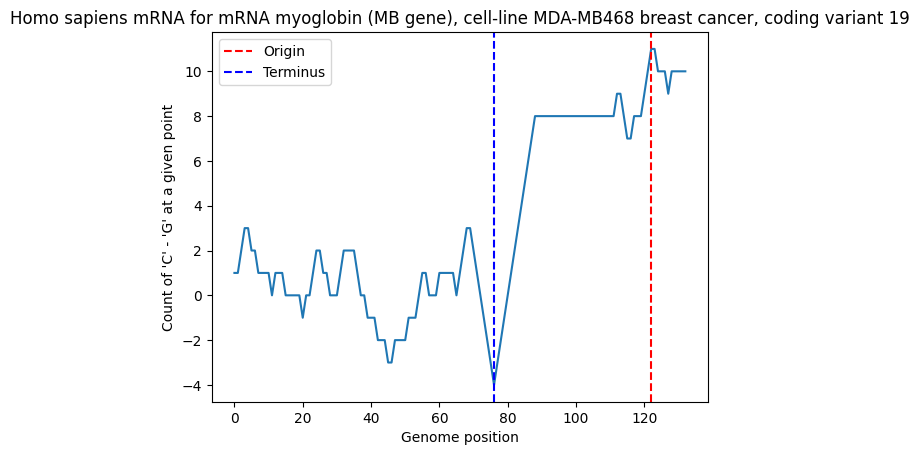

In [85]:
seq = '''CACCTGTGAATGCTTGAATTGCACCTGAGTTCCAAAGGAGAAGTTGACATTCTTCCAGAACATATGCCCA
GGGGGGGCCCCCCCCCCCCAAAAAAAAAAATTTTTTTTTTTACTGGTCAACCCAGTTGCATAA'''
seq= seq.replace("\n","",-1)
# get_seq("/content/sample_data/sequence.fasta")
dna = DNA()
print(f"The input seq is -:{dna.valid_dna(seq)}")
seq_needed= dna.valid_dna(seq)
print(f"The length of the seq is -: {dna.count_nucleotides(seq)}")
print(f"The g-c content of the seq is -: {dna.gc_content(seq)}")
gc_subseq = dna.gc_content_subseq(seq_needed,k = 2)
print(f"The g-c content of the sub-seq's is -: {gc_subseq}\n")

# Plot GC variation
cumulative = []
total = 0
for base in seq_needed:
    if base == 'C':
        total += 1
    elif base == 'G':
        total -= 1
    cumulative.append(total)

plt.plot(range(len(seq_needed)), cumulative)
plt.xlabel("Genome position")
plt.ylabel("Count of 'C' - 'G' at a given point")
ori_position = cumulative.index(max(cumulative))
ter_position = cumulative.index(min(cumulative))
plt.axvline(x=ori_position, color='red', linestyle='--', label='Origin')
plt.axvline(x=ter_position, color='blue', linestyle='--', label='Terminus')
plt.legend()
plt.title("Homo sapiens mRNA for mRNA myoglobin (MB gene), cell-line MDA-MB468 breast cancer, coding variant 19")
plt.show()

**FINAL CODE**

--- Running Analysis ---
Processing sequence... Length: 4639675 bp
Processing sequence... Length: 4411532 bp
Processing sequence... Length: 2874399 bp
--- Analysis Complete ---

The species for analysis are: ['E. coli K-12', 'Mycobacterium tuberculosis', 'Staphylococcus aureus']
The GC content of the respective species is: [50.79, 65.615, 32.784]

--- GC Content Results ---
  - E. coli K-12: 50.79%
  - Mycobacterium tuberculosis: 65.61%
  - Staphylococcus aureus: 32.78%


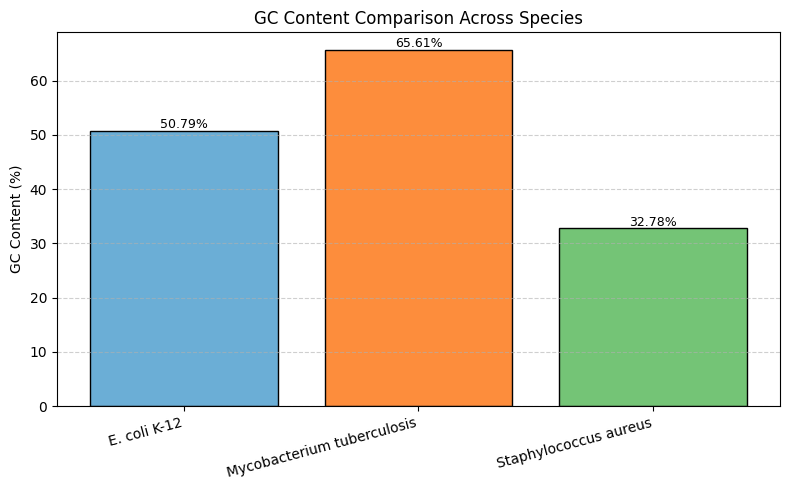

In [3]:
import matplotlib.pyplot as plt
import re

# -----------------------------------------------------------------
# OPTIMIZED HELPER FUNCTIONS & CLASS
# -----------------------------------------------------------------

def get_seq(url):
    """
    Reads a FASTA file and returns the concatenated sequence as a single string.
    Uses 'with open' for safe file handling and reads line-by-line.
    """
    sequence_lines = []
    try:
        with open(url, 'r') as fopen:
            for line in fopen:
                if line.startswith(">"):
                    continue  # Skip header lines
                else:
                    sequence_lines.append(line.strip())

    except FileNotFoundError:
        print(f"Error: The file '{url}' was not found.")
        return "" # Return an empty string on error
    except Exception as e:
        print(f"An error occurred while reading '{url}': {e}")
        return ""

    # Join all sequence lines into one continuous string and make it uppercase
    return "".join(sequence_lines).upper()

class DNA:
    """
    Optimized DNA class.
    - Uses sets for fast lookups.
    - Methods take strings as input and return raw data (int, float, list).
    - No longer has the 'self.seq_list' state bug.
    """
    def __init__(self):
        self.valid_nucleotides = {"A", "T", "C", "G"}

    def valid_dna(self, seq):
        """
        Validates and cleans a DNA sequence by removing invalid characters.
        Returns a clean *string*.
        """
        seq = seq.upper()
        clean_seq_chars = []
        for nucleotide in seq:
            if nucleotide in self.valid_nucleotides:
                clean_seq_chars.append(nucleotide)
            elif nucleotide.strip():
                # Silently skip invalid characters
                pass

        return "".join(clean_seq_chars)

    def count_nucleotides(self, seq):
        """Returns the length as an *int*."""
        return len(seq)

    def gc_content(self, seq):
        """Calculates GC content and returns a *float*."""
        if not seq:
            return 0.0

        g_count = seq.count("G")
        c_count = seq.count("C")

        gc_val = (g_count + c_count) / len(seq) * 100
        return round(gc_val, 3) # Return float

    def gc_content_subseq(self, seq, k=2):
        """Calculates GC for sub-sequences."""
        res = []
        for i in range(0, len(seq) - k + 1, k):
            subseq = seq[i : i + k]
            res.append(self.gc_content(subseq))
        return res

# -----------------------------------------------------------------
# OPTIMIZED GC SKEW FUNCTION
# -----------------------------------------------------------------

def gc_skew(seq, window=200):
    """
    Calculates GC skew for non-overlapping windows.
    Optimized to only slice the sub-sequence *once* per loop.
    """
    seq = seq.upper()
    skew_values = []

    for i in range(0, len(seq) - window + 1, window):
        # Optimization: Slice the window only once
        subseq = seq[i : i + window]

        g_count = subseq.count('G')
        c_count = subseq.count('C')
        gc_total = g_count + c_count

        # Avoid division by zero
        if gc_total == 0:
            skew_values.append(0.0)
        else:
            skew = (g_count - c_count) / gc_total
            skew_values.append(skew)

    return skew_values

# -----------------------------------------------------------------
# OPTIMIZED MAIN SCRIPT
# -----------------------------------------------------------------

# 1. Setup paths and names
url_list = ["/content/sample_data/E.coli.fasta", "/content/sample_data/Myco.fasta", "/content/sample_data/Staph.fasta"]
seq_dict = {
    "E. coli K-12": url_list[0],
    "Mycobacterium tuberculosis": url_list[1],
    "Staphylococcus aureus": url_list[2]
}
species_names = list(seq_dict.keys())

# 2. Load all sequences into memory
# (This assumes the get_seq function is defined above)
sequences_list = list(map(get_seq, url_list))

# 3. Optimized analysis function
def find_content(SEQ_list):
    """
    Analyzes a list of DNA sequences and returns a list of their GC contents.
    """
    dna = DNA()
    gc_content_list = []

    # Optimization: Iterate directly over the list
    for seq in SEQ_list:
        seq_needed = dna.valid_dna(seq)

        # Optimization: Avoid printing the entire (and massive) sequence
        print(f"Processing sequence... Length: {dna.count_nucleotides(seq_needed)} bp")

        # Append the float value returned by the optimized gc_content method
        gc_content_list.append(dna.gc_content(seq_needed))

    # Correction: Removed unreachable commented-out code from here
    return gc_content_list

# 4. --- CRITICAL OPTIMIZATION ---
#    Call the analysis function ONLY ONCE and store the results
print("--- Running Analysis ---")
gc_values = find_content(sequences_list)
print("--- Analysis Complete ---")

# 5. Report results in a clear, combined way
print(f"\nThe species for analysis are: {species_names}")
print(f"The GC content of the respective species is: {gc_values}\n")

# Combine results into a dictionary for a cleaner final report
gc_results = dict(zip(species_names, gc_values))
print("--- GC Content Results ---")
for species, gc in gc_results.items():
    print(f"  - {species}: {gc:.2f}%")


# 6. Plot the results
#    Reuse the 'gc_values' variable, do not run find_content() again
plt.figure(figsize=(8, 5))
bars = plt.bar(species_names, gc_values, color=['#6BAED6', '#FD8D3C', '#74C476'], edgecolor='black')
plt.title("GC Content Comparison Across Species")
plt.ylabel("GC Content (%)")
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels above bars
# Reuse the 'gc_values' variable here as well
for bar, val in zip(bars, gc_values):
    # 'val' is now correctly a float, so '.2f' formatting works
    plt.text(bar.get_x() + bar.get_width() / 2, val + 0.5, f"{val:.2f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show() # or plt.savefig("gc_content_comparison.png")

**Question 2: Sequence Composition Analysis (15 marks)
Develop advanced composition tools.**

In [1]:
def calculate_kmer_frequencies(seq, k):
    """
    Calculates the frequencies of all k-mers (e.g., dinucleotides,
    trinucleotides)
    in a given DNA sequence.

    Args:
        seq (str): The input DNA sequence (e.g., "ATGC...").
        k (int): The size of the k-mer (2 for dinucleotides, 3 for
        trinucleotides).

    Returns:
        dict: A dictionary where keys are the k-mers (str) and
              values are their frequencies (float).
    """
    # Ensure sequence is clean and uppercase
    seq = seq.upper().strip()

    # This dictionary will store the *counts* of each k-mer
    kmer_counts = {}

    # Calculate the total number of k-mers that will be found
    # For "ATGC" with k=2, windows are "AT", "TG", "GC". Total = 4 - 2 + 1 = 3
    total_kmers = len(seq) - k + 1

    # Handle edge case where the sequence is shorter than k
    if total_kmers <= 0:
        print(f"Warning: Sequence is shorter than k={k}. Returning empty dictionary.")
        return {}

    # --- Step 1: Count k-mers ---
    # Use a sliding window to move across the sequence
    for i in range(total_kmers):
        # Extract the k-mer "window"
        kmer = seq[i : i + k]

        # Update the count
        # .get(kmer, 0) fetches the current count, or 0 if it's not found
        kmer_counts[kmer] = kmer_counts.get(kmer, 0) + 1

    # --- Step 2: Calculate Frequencies ---
    kmer_frequencies = {}
    for kmer, count in kmer_counts.items():
        # Frequency = (count of this k-mer) / (total number of k-mers)
        kmer_frequencies[kmer] = round(count / total_kmers, 4)

    return kmer_frequencies

# -----------------------------------------------------------------
# --- Example Usage ---
# -----------------------------------------------------------------

sample_seq = "ATGCGTGCACGT"

# 1. Calculate Dinucleotide (k=2) Frequencies
di_freq = calculate_kmer_frequencies(sample_seq, 2)
print(f"--- Dinucleotide (k=2) Frequencies ---")
print(f"Sequence: {sample_seq}")
print(f"Total k-mers: {len(sample_seq) - 2 + 1}")
print(di_freq)
# Example: 'TG' appears 2 times out of 11 total k-mers (2/11 = 0.1818)

print("\n" + "="*100 + "\n")

# 2. Calculate Trinucleotide (k=3) Frequencies
tri_freq = calculate_kmer_frequencies(sample_seq, 3)
print(f"--- Trinucleotide (k=3) Frequencies ---")
print(f"Sequence: {sample_seq}")
print(f"Total k-mers: {len(sample_seq) - 3 + 1}")
print(tri_freq)
# Example: 'TGC' appears 2 times out of 10 total k-mers (2/10 = 0.2)

--- Dinucleotide (k=2) Frequencies ---
Sequence: ATGCGTGCACGT
Total k-mers: 11
{'AT': 0.0909, 'TG': 0.1818, 'GC': 0.1818, 'CG': 0.1818, 'GT': 0.1818, 'CA': 0.0909, 'AC': 0.0909}


--- Trinucleotide (k=3) Frequencies ---
Sequence: ATGCGTGCACGT
Total k-mers: 10
{'ATG': 0.1, 'TGC': 0.2, 'GCG': 0.1, 'CGT': 0.2, 'GTG': 0.1, 'GCA': 0.1, 'CAC': 0.1, 'ACG': 0.1}


**Identify CpG islands in genomic sequences**


In [9]:
def find_cpg_islands(seq, window_size=200, gc_thresh=0.5, ratio_thresh=0.6):
    """
    Finds all CpG islands in a given DNA sequence.

    Args:
        seq (str): The input DNA sequence.
        window_size (int): The length of the sliding window (default 200).
        gc_thresh (float): The minimum GC content (default 0.5, i.e., 50%).
        ratio_thresh (float): The minimum observed/expected CpG ratio (default 0.6).

    Returns:
        list: A list of tuples, where each tuple (start, end)
              marks the boundaries of a merged CpG island.
    """
    seq = seq.upper()
    total_len = len(seq)
    qualifying_windows = []

    # --- Step 1: Find all sliding windows that meet the criteria ---
    for i in range(total_len - window_size + 1):
        window = seq[i : i + window_size]

        # 1. Calculate GC Content
        g_count = window.count('G')
        c_count = window.count('C')
        gc_content = (g_count + c_count) / window_size

        # Skip window if GC content is too low
        if gc_content < gc_thresh:
            continue

        # 2. Calculate CpG Observed/Expected Ratio
        cpg_observed = window.count('CG')

        # Handle division by zero if no G or C is in the window
        if g_count == 0 or c_count == 0:
            cpg_ratio = 0.0
        else:
            cpg_expected = (c_count * g_count) / window_size
            cpg_ratio = cpg_observed / cpg_expected

        # If this window qualifies, add its start/end positions
        if cpg_ratio > ratio_thresh:
            qualifying_windows.append((i, i + window_size))

    # --- Step 2: Merge overlapping windows ---
    if not qualifying_windows:
        return []  # No islands found

    merged_islands = []

    # Sort by start position (already sorted, but good practice)
    # Start with the first qualifying window
    current_start, current_end = qualifying_windows[0]

    for next_start, next_end in qualifying_windows[1:]:
        if next_start <= current_end:
            # Overlap found: extend the current island's end
            current_end = max(current_end, next_end)
        else:
            # Gap found: the previous island is complete, save it
            merged_islands.append((current_start, current_end))
            # Start a new island
            current_start, current_end = next_start, next_end

    # Don't forget to add the last island
    merged_islands.append((current_start, current_end))

    return merged_islands

# -----------------------------------------------------------------
# --- Example Usage ---
# -----------------------------------------------------------------

# Let's create a test sequence:
# 300 bases of "normal" DNA (low GC, low CpG)
normal_dna = "ATTATATATTATATTATATTATATTATATTATATTATATTATATTATATTATATTATATTATATTATAT" * 5
# 250 bases of a "CpG island" (high GC, high CpG)
cpg_island = "CGCGCGCGGCGCGCGCGCGCCGCGCGCGCCGCGCGCCGCGCGCGCGGCGCGCGCGCGC" * 5
# 300 bases of "normal" DNA again
normal_dna_2 = "ATATATTATATTATATTATATTATATTATATTATATTATATTATATTATATTATATTATATTATATAT" * 5

# Our full sequence
sample_genome = normal_dna + cpg_island + normal_dna_2

print(f"Total sequence length: {len(sample_genome)} bp")
print(f"Known island location: Start={len(normal_dna)}, End={len(normal_dna) + len(cpg_island)}")

# Run the finder
islands = find_cpg_islands(sample_genome)

print(f"\nFound {len(islands)} CpG island(s):")
for start, end in islands:
    print(f"  - Position: {start} to {end} (Length: {end - start} bp)")

Total sequence length: 975 bp
Known island location: Start=345, End=635

Found 1 CpG island(s):
  - Position: 245 to 735 (Length: 490 bp)


**Analyze codon usage bias in protein-coding regions**

In [13]:
# --- A standard DNA to Amino Acid Codon Table ---
# This is our reference to know which codons are synonymous.
CODON_TABLE = {
    'TTT': 'F', 'TTC': 'F', # Phenylalanine
    'TTA': 'L', 'TTG': 'L', 'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L', # Leucine
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I', # Isoleucine
    'ATG': 'M', # Methionine (Start)
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V', # Valine
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S', 'AGT': 'S', 'AGC': 'S', # Serine
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P', # Proline
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T', # Threonine
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A', # Alanine
    'TAT': 'Y', 'TAC': 'Y', # Tyrosine
    'TAA': 'Stop', 'TAG': 'Stop', 'TGA': 'Stop', # Stop Codons
    'CAT': 'H', 'CAC': 'H', # Histidine
    'CAA': 'Q', 'CAG': 'Q', # Glutamine
    'AAT': 'N', 'AAC': 'N', # Asparagine
    'AAA': 'K', 'AAG': 'K', # Lysine
    'GAT': 'D', 'GAC': 'D', # Aspartic Acid
    'GAA': 'E', 'GAG': 'E', # Glutamic Acid
    'TGT': 'C', 'TGC': 'C', # Cysteine
    'TGG': 'W', # Tryptophan
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AGA': 'R', 'AGG': 'R', # Arginine
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G', # Glycine
}

def analyze_codon_usage(cds_seq):
    """
    Analyzes the codon usage bias of a given protein-coding sequence (CDS).

    Args:
        cds_seq (str): The input DNA sequence, which must be a
                       protein-coding region (CDS).

    Returns:
        dict: A nested dictionary structured as:
              { 'AminoAcid': { 'Codon': {'count': int, 'frequency': float} } }
    """
    cds_seq = cds_seq.upper()
    codon_counts = {}
    aa_counts = {}
    usage_analysis = {}

    # --- Sanity Check ---
    # Ensure the sequence is a valid coding sequence length
    if len(cds_seq) % 3 != 0:
        remainder = len(cds_seq) % 3
        print(f"Warning: Sequence length is not a multiple of 3. "
              f"Truncating last {remainder} base(s).")
        cds_seq = cds_seq[:-remainder]

    # --- Step 1: Count all individual codons ---
    for i in range(0, len(cds_seq), 3):
        codon = cds_seq[i : i+3]

        if codon in CODON_TABLE:
            codon_counts[codon] = codon_counts.get(codon, 0) + 1
        else:
            # Handle unknown codons (e.g., 'NNN' or 'ATN')
            print(f"Warning: Unknown codon '{codon}' found. Skipping.")

    # --- Step 2: Sum codon counts to get total amino acid counts ---
    for codon, count in codon_counts.items():
        aa = CODON_TABLE[codon]
        aa_counts[aa] = aa_counts.get(aa, 0) + count

    # --- Step 3: Calculate relative frequencies and build final report ---
    for codon, count in codon_counts.items():
        aa = CODON_TABLE[codon]
        total_aa_count = aa_counts[aa]

        # Calculate the frequency of this codon *relative to its amino acid*
        frequency = 0.0
        if total_aa_count > 0:
            # This is the "bias" calculation
            frequency = count / total_aa_count

        # Initialize the nested dictionary for this amino acid if it's new
        if aa not in usage_analysis:
            usage_analysis[aa] = {}

        # Store the results
        usage_analysis[aa][codon] = {
            'count': count,
            'frequency': round(frequency, 4) # Round for neatness
        }

    return usage_analysis

def print_usage_analysis(analysis):
    """
    A helper function to print the analysis results in a clean, readable format.
    """
    # Sort by amino acid name
    for aa in sorted(analysis.keys()):
        # Get total count for this AA from its first codon's data
        # (A bit of a hack, but it works)
        first_codon_data = list(analysis[aa].values())[0]
        total_count = int(round(first_codon_data['count'] / first_codon_data['frequency'])) \
                      if first_codon_data['frequency'] > 0 else 0

        print(f"--- Amino Acid: {aa} (Total: {total_count}) ---")

        # Sort codons for a consistent output
        for codon in sorted(analysis[aa].keys()):
            data = analysis[aa][codon]
            # Print formatted: 5 counts, 6.2f%
            print(f"  {codon}: {data['count']:>5} counts  ({data['frequency'] * 100:6.2f}%)")
        print("") # Add a newline for readability

# -----------------------------------------------------------------
# --- Example Usage ---
# -----------------------------------------------------------------

# A sample coding sequence (CDS) from E. coli
# This sequence shows a clear bias for TCC over TCT for Serine.
sample_cds = (
    "ATGCGTATTTCCTCGCCGCTGTCGCTGAGCGCTAAAGAAATTGCCGCATTATGG"
    "TCCGCTTCCAGCGCCCATCTCTCGCTTTGCCGCTGGTTTCTCGGTTGATTCCGG"
    "TCCAGCGTTATTGCTGCCGATTCTGAAGAAGTTGGTCAAAAAGAAAAACGTATT"
    "GAATTCGATTCCGTTGAAAAAGTTATTGCTGCTGAATCTGGTGATTTCCTGAGC"
    "GAACTGCGTGAAATTGTTGAAGAATCTAAATAA"
)

print(f"Analyzing sequence of length: {len(sample_cds)} bp\n")

# 1. Run the analysis
codon_bias_data = analyze_codon_usage(sample_cds)

# 2. Print the formatted results
print_usage_analysis(codon_bias_data)



# Look at the Serine (S) block. Although there are 6 different codons for Serine, this specific gene used:

# TCC: 4 times (50.00% of all Serines)

# TCG: 2 times (25.00%)

# AGC: 1 time (12.50%)

# TCT: 1 time (12.50%)

# This clearly shows a codon usage bias in favor of TCC for this particular gene.


Analyzing sequence of length: 249 bp

--- Amino Acid: A (Total: 9) ---
  GCA:     1 counts  ( 11.11%)
  GCC:     3 counts  ( 33.33%)
  GCT:     5 counts  ( 55.56%)

--- Amino Acid: C (Total: 1) ---
  TGC:     1 counts  (100.00%)

--- Amino Acid: D (Total: 3) ---
  GAT:     3 counts  (100.00%)

--- Amino Acid: E (Total: 11) ---
  GAA:    11 counts  (100.00%)

--- Amino Acid: F (Total: 4) ---
  TTC:     3 counts  ( 75.00%)
  TTT:     1 counts  ( 25.00%)

--- Amino Acid: G (Total: 3) ---
  GGT:     3 counts  (100.00%)

--- Amino Acid: H (Total: 1) ---
  CAT:     1 counts  (100.00%)

--- Amino Acid: I (Total: 6) ---
  ATT:     6 counts  (100.00%)

--- Amino Acid: K (Total: 5) ---
  AAA:     5 counts  (100.00%)

--- Amino Acid: L (Total: 8) ---
  CTC:     2 counts  ( 25.00%)
  CTG:     4 counts  ( 50.00%)
  CTT:     1 counts  ( 12.50%)
  TTA:     1 counts  ( 12.50%)

--- Amino Acid: M (Total: 1) ---
  ATG:     1 counts  (100.00%)

--- Amino Acid: P (Total: 1) ---
  CCG:     1 counts  (100.0

**Generate composition-based sequence classification**

In [4]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# STEP 1: Feature Extraction (The "Vectorizer")
# -----------------------------------------------------------------
def get_kmer_feature_vector(seq, k):
    """
    Converts a DNA sequence into a fixed-length numerical feature vector
    based on its k-mer frequencies.

    This is CRITICAL for machine learning.
    """
    # 1. Generate a master list of all possible k-mers in a fixed order
    #    e.g., for k=2: ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', ...]
    bases = ['A', 'C', 'G', 'T']
    master_kmer_list = [''.join(p) for p in itertools.product(bases, repeat=k)]

    # 2. Get the frequency dictionary for the sequence
    seq_freqs = calculate_kmer_frequencies(seq, k)

    # 3. Create the feature vector
    #    Initialize a vector of zeros, one for each k-mer in the master list
    feature_vector = [0.0] * len(master_kmer_list)

    # 4. Fill the vector with frequencies
    #    This ensures that if a k-mer is missing from the sequence,
    #    its value is 0.0, but it's still in the vector.
    for i, kmer in enumerate(master_kmer_list):
        if kmer in seq_freqs:
            feature_vector[i] = seq_freqs[kmer]

    return feature_vector

# -----------------------------------------------------------------
# STEP 2: Prepare Training Data
# -----------------------------------------------------------------
# In a real project, you would load this from many FASTA files.
# Here, we create DUMMY data with obvious biases.

# M. tuberculosis is known to be very GC-rich
mtb_data = [
    "GCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC",
    "CCGGCCGGCCGGCCGGCCGGCCGGCCGGCCGGCCGGCCGGCCGGCCGGCC",
    "GATTACAGCGGGCGCGTATAGCGCTAGCGTCTAGCGGCTAGCTAGCTAGC",
    "CGCGCGTATGCGCGTATGCGCGTATGCGCGTATGCGCGTATGCGCGTATA",
]

# S. aureus is known to be very AT-rich
staph_data = [
    "ATATATATATATATATATATATATATATATATATATATATATATATATAT",
    "AATTAATTAATTAATTAATTAATTAATTAATTAATTAATTAATTAATTAA",
    "TATATATATATATAGCATAAATAAATAGCTAGCTAGCATAAATAGCTAGC",
    "ATATATATATGCATATATATATGCATATATATATGCATATATATATATGC",
]

# Combine into a single dataset
sequences = mtb_data + staph_data
# Create corresponding labels
labels = ["M. tuberculosis"] * len(mtb_data) + ["S. aureus"] * len(staph_data)

print(f"Total training sequences: {len(sequences)}")
print("---")

# -----------------------------------------------------------------
# STEP 3: Create and Train the Classifier
# -----------------------------------------------------------------

# We will use k=2 (dinucleotides). k=3 or k=4 can be more powerful.
K_VALUE = 2

# 1. Vectorize all sequences
#    This converts each sequence string into a list of 16 numbers (for k=2)
X_features = [get_kmer_feature_vector(seq, K_VALUE) for seq in sequences]
y_labels = labels

# 2. Split data into training and testing sets (good practice)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.25, random_state=42, stratify=y_labels
)

# 3. Create and train the k-NN model
#    We'll tell it to look at the 3 nearest neighbors (n_neighbors=3)
print("Training the k-NN classifier...")
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Model trained.")
print("---")

# 4. Test the model's accuracy on the held-out test data
test_predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")
print("---")

# -----------------------------------------------------------------
# STEP 4: Create the Final Classification Tool
# -----------------------------------------------------------------

def classify_sequence(new_seq, model, k):
    """
    Classifies a new, unknown DNA sequence using the trained model.

    Args:
        new_seq (str): The unknown DNA sequence.
        model: The trained scikit-learn model.
        k (int): The k-mer size the model was trained on.

    Returns:
        str: The predicted species/label.
    """
    # 1. Convert the new sequence into the *same* feature vector format
    feature_vector = get_kmer_feature_vector(new_seq, k)

    # 2. Reshape the vector for the model
    #    .predict() expects a 2D array (a list of samples)
    reshaped_vector = [feature_vector]

    # 3. Make the prediction
    prediction = model.predict(reshaped_vector)

    # 4. Return the first (and only) prediction
    return prediction[0]

# -----------------------------------------------------------------
# --- Example Usage ---
# -----------------------------------------------------------------

# An unknown sequence that is very AT-rich
unknown_seq_1 = "AAAAATATATATATATATATATATTATATATATATATATATATATATAT"

# An unknown sequence that is very GC-rich
unknown_seq_2 = "GCGCGCGCGCGCCGGCCGGCCGGCGCGCGCGCGCGCGCGCGCGCGCGCG"

# Classify the sequences
prediction_1 = classify_sequence(unknown_seq_1, model, K_VALUE)
prediction_2 = classify_sequence(unknown_seq_2, model, K_VALUE)

print(f"Unknown Sequence 1 (AT-rich) classified as: {prediction_1}")
print(f"Unknown Sequence 2 (GC-rich) classified as: {prediction_2}")

Total training sequences: 8
---
Training the k-NN classifier...
Model trained.
---
Model Accuracy on Test Data: 100.00%
---
Unknown Sequence 1 (AT-rich) classified as: S. aureus
Unknown Sequence 2 (GC-rich) classified as: M. tuberculosis


**Part B: Pattern Matching and Motif Discovery (40 marks)**

Question 3: Hamming Distance Implementation (15 marks)

Question 4: Motif Finding Algorithms (25 marks)

   Part B: Pattern Matching and Motif Discovery Demo

--- Question 3: Hamming Distance ---
Seq 1: GAGCCTACT
Seq 2: GAGCATAAT
Hamming Distance (Q3a): 2

Calculating matrix for 5 sequences of unequal length...

--- Distance Matrix (Text Visualization) ---
              SeqA    SeqB    SeqC    SeqD    SeqE
--------------------------------------------------
SeqA          0.00    1.00    3.12    7.00    4.00
SeqB          1.00    0.00    3.00    6.00    4.00
SeqC          3.12    3.00    0.00    3.62    7.00
SeqD          7.00    6.00    3.62    0.00    4.75
SeqE          4.00    4.00    7.00    4.75    0.00

Generating heatmap... (Check for pop-up window)
Heatmap saved to 'distance_matrix_heatmap.png'


--- Question 4: Motif Finding ---
Genome:  GATCCAGATTAGAGATTACACAGATTACCGATTACC
Pattern: GATTAC

Exact Matches (Q4a): [13, 22, 29]
Fuzzy Matches (k=1) (Q4b): [6, 13, 22, 29]

--- Motif Conservation Analysis for 'GATTACA' (k=2) ---
Found 5 total motif instances across 5 sequences.

Profile M

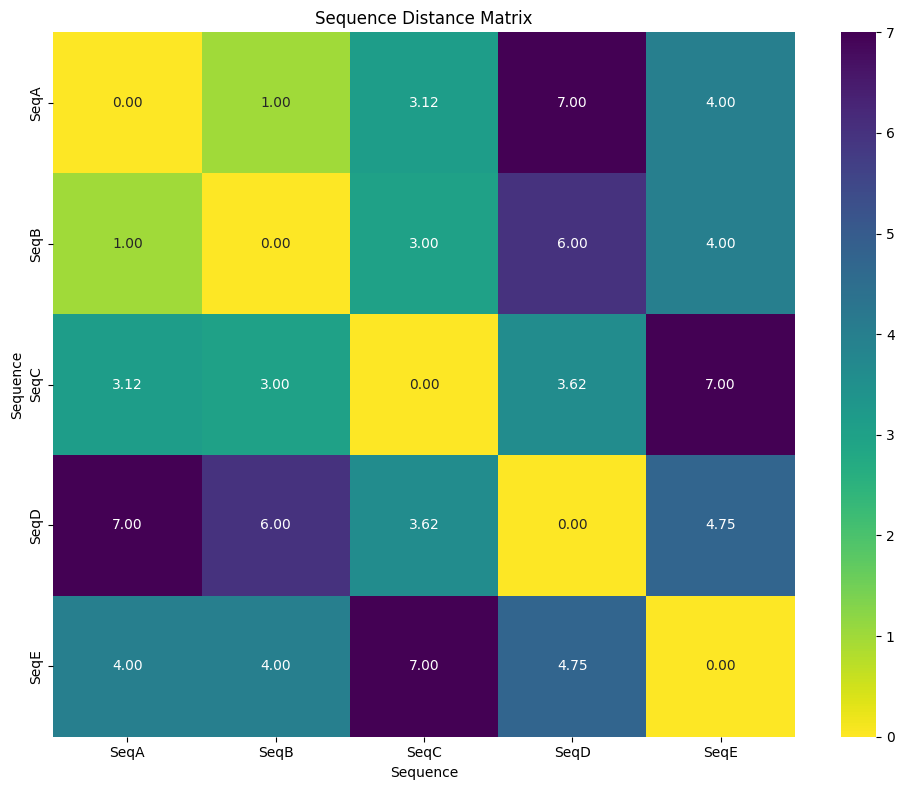

In [5]:
#!/usr/bin/env python3

"""
Compendium of Bioinformatics Solutions
Part B: Pattern Matching and Motif Discovery (Questions 3 & 4)

This script contains functions for:
- Q3: Hamming distance, unequal-length distance, distance matrices,
      and heatmap visualization.
- Q4: Exact matching, fuzzy matching (with mismatches), and
      motif conservation analysis (profile matrix and consensus sequence).

Required libraries (for Q3d visualization):
pip install matplotlib seaborn
"""

import math
from collections import Counter
# Import visualization libraries
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    VIZ_LIBS_INSTALLED = True
except ImportError:
    VIZ_LIBS_INSTALLED = False

# -----------------------------------------------------------------
# --- Question 3: Hamming Distance Implementation
# -----------------------------------------------------------------

def hamming_distance(seq1: str, seq2: str) -> int:
    """
    Q3a: Calculates the Hamming distance between two sequences of EQUAL length.

    Hamming distance is the number of positions at which the
    corresponding symbols are different.
    """
    if len(seq1) != len(seq2):
        raise ValueError("Hamming distance is undefined for sequences of unequal length.")

    distance = 0
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            distance += 1
    return distance

def alignment_distance(seq1: str, seq2: str) -> float:
    """
    Q3b: Calculates a distance for sequences of DIFFERENT lengths.

    This is a "sophisticated" distance that finds the best
    Hamming distance for any k-mer in the longer sequence
    against the shorter sequence, adding a penalty for the length
    difference.

    Returns:
        float: A distance score (can be float due to normalization).
               Lower is more similar.
    """
    # Identify shorter and longer sequence
    if len(seq1) < len(seq2):
        short_seq, long_seq = seq1, seq2
    else:
        short_seq, long_seq = seq2, seq1

    k = len(short_seq)
    n = len(long_seq)

    # 1. Find the best matching window in the longer sequence
    min_dist = float('inf')

    if k == n:
        # If lengths are equal, just use Hamming
        return hamming_distance(seq1, seq2)

    for i in range(n - k + 1):
        window = long_seq[i : i + k]
        dist = hamming_distance(short_seq, window)
        if dist < min_dist:
            min_dist = dist

    # 2. Add a penalty for the length difference
    # A simple penalty is the difference in lengths
    length_penalty = n - k

    # We can normalize the Hamming distance to make it comparable
    # to the length penalty.
    normalized_dist = min_dist / k

    # Total distance is the sum of the best-match dissimilarity
    # and the length difference.
    # (Note: Many different distance metrics exist; this is one valid approach.)
    total_distance = normalized_dist + length_penalty

    return total_distance

def create_distance_matrix(seqs: list[str], labels: list[str]) -> (list[list[float]], list[str]):
    """
    Q3c: Calculates the distance matrix for multiple sequences.

    Uses the `alignment_distance` function to handle sequences
    of different lengths.
    """
    n = len(seqs)
    # Initialize an n x n matrix with zeros
    matrix = [[0.0] * n for _ in range(n)]

    for i in range(n):
        for j in range(i + 1, n):
            # Calculate distance between seqs[i] and seqs[j]
            dist = alignment_distance(seqs[i], seqs[j])

            # Matrix is symmetric
            matrix[i][j] = dist
            matrix[j][i] = dist

    return matrix, labels

def print_distance_matrix(matrix: list[list[float]], labels: list[str]):
    """
    Q3d (Part 1): Visualize distance relationships using a text-based data structure.

    Prints a neatly formatted matrix to the console.
    """
    print("\n--- Distance Matrix (Text Visualization) ---")

    # Print header row
    header = " " * 10 + "".join([f"{label:>8}" for label in labels])
    print(header)
    print("-" * len(header))

    # Print each data row
    for i, label in enumerate(labels):
        row_str = f"{label:<10}"
        for val in matrix[i]:
            row_str += f"{val:8.2f}"
        print(row_str)

def visualize_distance_matrix(matrix: list[list[float]], labels: list[str]):
    """
    Q3d (Part 2): Visualize distance relationships using a graphical heatmap.

    Uses seaborn and matplotlib for a proper visualization.
    """
    if not VIZ_LIBS_INSTALLED:
        print("\nSkipping heatmap visualization: 'matplotlib' or 'seaborn' not found.")
        print("Please run 'pip install matplotlib seaborn' to enable this feature.")
        return

    print("\nGenerating heatmap... (Check for pop-up window)")
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        matrix,
        annot=True,
        fmt=".2f",
        cmap="viridis_r", # '_r' reverses the colormap (low = dark)
        xticklabels=labels,
        yticklabels=labels
    )
    plt.title("Sequence Distance Matrix")
    plt.xlabel("Sequence")
    plt.ylabel("Sequence")
    plt.tight_layout()
    # Save the figure instead of showing, as 'plt.show()' blocks script execution
    plt.savefig("distance_matrix_heatmap.png")
    print("Heatmap saved to 'distance_matrix_heatmap.png'")


# -----------------------------------------------------------------
# --- Question 4: Motif Finding Algorithms
# -----------------------------------------------------------------

def find_exact_matches(text: str, pattern: str) -> list[int]:
    """
    Q4a & Q4c: Implements exact pattern matching.

    Finds ALL occurrences of the exact pattern in the genomic sequence.
    """
    indices = []
    n = len(text)
    m = len(pattern)

    if m > n:
        return []

    for i in range(n - m + 1):
        window = text[i : i + m]
        if window == pattern:
            indices.append(i)

    return indices

def find_fuzzy_matches(text: str, pattern: str, max_mismatches: int) -> list[int]:
    """
    Q4b & Q4c: Implements fuzzy matching with allowed mismatches.

    Finds ALL occurrences of the pattern, allowing up to
    `max_mismatches` (using Hamming distance).
    """
    indices = []
    n = len(text)
    m = len(pattern)

    if m > n:
        return []

    for i in range(n - m + 1):
        window = text[i : i + m]

        # Use the Hamming distance from Q3
        dist = hamming_distance(window, pattern)

        if dist <= max_mismatches:
            indices.append(i)

    return indices

def analyze_motif_conservation(seq_list: list[str], motif: str, max_mismatches: int):
    """
    Q4d: Analyzes motif conservation across multiple sequences.

    This function:
    1. Finds all fuzzy matches for the motif in all sequences.
    2. Collects all matching k-mers (e.g., ['GATTACA', 'GCTTACA', 'GATTCCA']).
    3. Builds a "Profile Matrix" (counts of A, C, G, T at each position).
    4. Generates a "Consensus Sequence" from the profile.
    """
    print(f"\n--- Motif Conservation Analysis for '{motif}' (k={max_mismatches}) ---")

    all_matches = []
    for seq in seq_list:
        indices = find_fuzzy_matches(seq, motif, max_mismatches)
        for i in indices:
            all_matches.append(seq[i : i + len(motif)])

    if not all_matches:
        print("No motifs found within the given mismatch threshold.")
        return

    print(f"Found {len(all_matches)} total motif instances across {len(seq_list)} sequences.")

    # --- 1. Create the Profile Matrix ---
    k = len(motif)
    # Initialize profile as a list of dictionaries (one for each position)
    profile = [{base: 0 for base in "ACGT"} for _ in range(k)]

    for match in all_matches:
        for i in range(k):
            base = match[i]
            if base in profile[i]:
                profile[i][base] += 1

    print("\nProfile Matrix (Base Counts):")
    # Print a header
    print("Pos:  " + "".join([f" {base}  " for base in "ACGT"]))
    print("-" * 21)

    for i, pos_counts in enumerate(profile):
        # Format: "1:   5   0   0   2"
        counts_str = "".join([f"{pos_counts[base]:3} " for base in "ACGT"])
        print(f" {i+1:<4} {counts_str}")

    # --- 2. Create the Consensus Sequence ---
    consensus = ""
    for pos_counts in profile:
        # Find the base with the highest count for this position
        best_base = max(pos_counts, key=pos_counts.get)
        consensus += best_base

    print(f"\nConsensus Sequence: {consensus}")

    return profile, consensus


# -----------------------------------------------------------------
# --- Main Execution and Demonstration
# -----------------------------------------------------------------
if __name__ == "__main__":

    print("="*60)
    print("   Part B: Pattern Matching and Motif Discovery Demo")
    print("="*60)

    # --- Q3 Demonstration ---
    print("\n--- Question 3: Hamming Distance ---")

    # 3a. Hamming Distance
    s1 = "GAGCCTACT"
    s2 = "GAGCATAAT"
    print(f"Seq 1: {s1}")
    print(f"Seq 2: {s2}")
    print(f"Hamming Distance (Q3a): {hamming_distance(s1, s2)}")

    # 3b-d. Distance Matrix
    seq_list = [
        "ATATATAG",  # Seq A
        "ATATAGAG",  # Seq B
        "ATATAGAGCCC", # Seq C
        "CGCGCGCG",  # Seq D
        "ATAG"       # Seq E
    ]
    labels = ["SeqA", "SeqB", "SeqC", "SeqD", "SeqE"]

    print(f"\nCalculating matrix for {len(labels)} sequences of unequal length...")

    # 3c. Calculate Matrix
    matrix, labels = create_distance_matrix(seq_list, labels)

    # 3d. Visualize Matrix
    print_distance_matrix(matrix, labels)
    visualize_distance_matrix(matrix, labels)


    # --- Q4 Demonstration ---
    print("\n" + "="*60)
    print("\n--- Question 4: Motif Finding ---")

    genome = "GATCCAGATTAGAGATTACACAGATTACCGATTACC"
    pattern = "GATTAC"

    print(f"Genome:  {genome}")
    print(f"Pattern: {pattern}")

    # 4a. Exact Matching
    exact_hits = find_exact_matches(genome, pattern)
    print(f"\nExact Matches (Q4a): {exact_hits}")

    # 4b. Fuzzy Matching
    fuzzy_hits = find_fuzzy_matches(genome, pattern, max_mismatches=1)
    print(f"Fuzzy Matches (k=1) (Q4b): {fuzzy_hits}")

    # 4d. Motif Conservation Analysis
    motif_seq_list = [
        "AGAGATTACAGAG",
        "TCTGCTTACACTC",
        "GGGGATTCCAGGG",
        "TTTGATTACATTT",
        "AGAGGTTACAGAG" # This one has 2 mismatches
    ]
    # We are looking for variations of "GATTACA" with up to 2 mismatches
    analyze_motif_conservation(motif_seq_list, "GATTACA", 2)

**Part C: Protein Sequence Analysis (30 marks)**

**Question 5: Reading Frame Analysis (15 marks)**

**Question 6: Protein Translation and Analysis (15 marks)**

In [6]:
#!/usr/bin/env python3

"""
Compendium of Bioinformatics Solutions
Part C: Protein Sequence Analysis (Questions 5 & 6)

This script provides a full suite of tools for:
- Q5: Finding all 6 reading frames, identifying start/stop codons,
      extracting all Open Reading Frames (ORFs), and calculating
      their statistics.
- Q6: Translating DNA/RNA to protein, handling the genetic code,
      identifying the longest ORF, and analyzing protein
      amino acid composition and properties.
"""

from collections import Counter
import re

# -----------------------------------------------------------------
# --- Part 1: Core Data (for Q6b and Q6d)
# -----------------------------------------------------------------

# Q6b: Handle the genetic code using dictionaries
GENETIC_CODE = {
    'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L',
    'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L',
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M',
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V',
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S',
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'TAT': 'Y', 'TAC': 'Y', 'TAA': 'Stop', 'TAG': 'Stop',
    'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'TGT': 'C', 'TGC': 'C', 'TGA': 'Stop', 'TGG': 'W',
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G',
}

# Q6d: Data for analyzing amino acid properties
AMINO_ACID_PROPERTIES = {
    # Hydrophobic (Nonpolar)
    'A': 'Hydrophobic', 'V': 'Hydrophobic', 'I': 'Hydrophobic',
    'L': 'Hydrophobic', 'M': 'Hydrophobic', 'F': 'Hydrophobic',
    'W': 'Hydrophobic', 'P': 'Hydrophobic', 'G': 'Hydrophobic',
    # Hydrophilic (Polar)
    'S': 'Hydrophilic', 'T': 'Hydrophilic', 'C': 'Hydrophilic',
    'Y': 'Hydrophilic', 'N': 'Hydrophilic', 'Q': 'Hydrophilic',
    # Acidic (Negatively charged)
    'D': 'Acidic', 'E': 'Acidic',
    # Basic (Positively charged)
    'K': 'Basic', 'R': 'Basic', 'H': 'Basic',
    # Special
    '?': 'Unknown', '*': 'Stop'
}

# -----------------------------------------------------------------
# --- Part 2: Core DNA/RNA Translation Functions (Q5a, Q6a)
# -----------------------------------------------------------------

def reverse_complement(seq: str) -> str:
    """Helper function to get the reverse complement of a DNA sequence."""
    seq = seq.upper().replace('U', 'T')
    complement_map = str.maketrans('ATCG', 'TAGC')
    return seq.translate(complement_map)[::-1]

def get_six_frames(seq: str) -> dict[str, str]:
    """
    Q5a: Identify all six reading frames in a DNA sequence.

    Returns a dictionary mapping frame name (e.g., '+1', '-2')
    to its corresponding DNA sequence.
    """
    seq = seq.upper().replace('U', 'T')
    rev_seq = reverse_complement(seq)

    frames = {
        '+1': seq,
        '+2': seq[1:],
        '+3': seq[2:],
        '-1': rev_seq,
        '-2': rev_seq[1:],
        '-3': rev_seq[2:],
    }
    return frames

def translate_raw(seq: str) -> str:
    """
    Q6a: Convert a DNA or RNA sequence to an amino acid sequence.

    This is a "raw" translation from frame +1. It does NOT
    look for a start codon. It translates 'Stop' codons to '*'.
    """
    seq = seq.upper().replace('U', 'T')
    protein = []

    # Ensure sequence length is a multiple of 3
    seq_len = len(seq)
    for i in range(0, seq_len - (seq_len % 3), 3):
        codon = seq[i : i + 3]
        amino_acid = GENETIC_CODE.get(codon, '?') # '?' for unknown codons (e.g., 'NNN')

        if amino_acid == 'Stop':
            protein.append('*')
        else:
            protein.append(amino_acid)

    return "".join(protein)

# -----------------------------------------------------------------
# --- Part 3: ORF Finding and Analysis (Q5b, Q5c, Q5d, Q6c)
# -----------------------------------------------------------------

class ORF:
    """A simple class to store ORF information."""
    def __init__(self, frame: str, start: int, stop: int, protein: str):
        self.frame = frame
        self.start_in_frame = start
        self.stop_in_frame = stop
        self.protein_sequence = protein
        self.protein_length = len(protein)

    def __repr__(self):
        return (f"ORF(Frame: {self.frame}, Start: {self.start_in_frame}, "
                f"Stop: {self.stop_in_frame}, Length: {self.protein_length} aa)")

def find_orfs(seq: str, min_prot_len: int = 30) -> list[ORF]:
    """
    Q5b, Q5c: Finds all ORFs in all 6 frames.

    - Q5b: Implicitly finds start ('ATG') and stop codons.
    - Q5c: Extracts the potential protein sequences.

    Returns a list of ORF objects, filtered by min_prot_len.
    """
    seq = seq.upper().replace('U', 'T')
    frames = get_six_frames(seq)
    all_orfs = []

    for frame_name, frame_seq in frames.items():
        # Find all start codons ('ATG')
        # (?:ATG) is a non-capturing group
        # (?:...)*? is a non-greedy match of any 3-base-pair codons
        # (?:TAA|TAG|TGA) is a non-capturing group for stop codons

        # This regex finds 'ATG' followed by any number of codons,
        # ending at the first 'Stop' codon.
        regex = r'(?=(ATG(?:...)*?(?:TAA|TAG|TGA)))'

        for match in re.finditer(regex, frame_seq):
            orf_dna = match.group(1)
            orf_start_pos = match.start()

            # Translate the ORF, stopping at the first '*'
            protein = translate_raw(orf_dna).split('*', 1)[0]

            if len(protein) >= min_prot_len:
                orf_end_pos = orf_start_pos + len(orf_dna)
                all_orfs.append(ORF(
                    frame=frame_name,
                    start=orf_start_pos,
                    stop=orf_end_pos,
                    protein=protein
                ))

    return all_orfs

def calculate_orf_statistics(orf_list: list[ORF]):
    """
    Q5d: Calculate ORF statistics and length distributions.
    """
    if not orf_list:
        print("No ORFs found meeting the criteria.")
        return

    print(f"\n--- ORF Statistics ---")
    print(f"Total ORFs found: {len(orf_list)}")

    lengths = [orf.protein_length for orf in orf_list]

    print(f"Max protein length: {max(lengths)} aa")
    print(f"Min protein length: {min(lengths)} aa")
    print(f"Avg protein length: {sum(lengths) / len(lengths):.2f} aa")

    # Simple length distribution
    print("\nLength Distribution:")
    bins = Counter((length // 50) * 50 for length in lengths)
    for length_bin in sorted(bins.keys()):
        print(f"  {length_bin}-{length_bin + 49} aa: {bins[length_bin]} count")

def get_longest_orf(orf_list: list[ORF]) -> ORF | None:
    """
    Q6c: Identify and translate the longest ORF.

    (Translation is already done by find_orfs).
    This function simply finds the longest one from the list.
    """
    if not orf_list:
        return None
    return max(orf_list, key=lambda orf: orf.protein_length)

# -----------------------------------------------------------------
# --- Part 4: Protein Property Analysis (Q6d)
# -----------------------------------------------------------------

def analyze_protein_composition(protein_seq: str):
    """
    Q6d: Analyze amino acid composition and properties.
    """
    if not protein_seq:
        print("Cannot analyze empty protein sequence.")
        return

    print(f"\n--- Protein Analysis (Length: {len(protein_seq)} aa) ---")

    # 1. Amino Acid Composition
    print("\n1. Amino Acid Composition:")
    aa_counts = Counter(protein_seq)
    total_aas = len(protein_seq)

    for aa in sorted(aa_counts.keys()):
        count = aa_counts[aa]
        percentage = (count / total_aas) * 100
        print(f"  {aa}: {count:>4}  ({percentage:5.2f}%)")

    # 2. Amino Acid Properties
    print("\n2. Property Group Composition:")
    property_counts = Counter()
    for aa, count in aa_counts.items():
        prop = AMINO_ACID_PROPERTIES.get(aa, 'Unknown')
        property_counts[prop] += count

    for prop in sorted(property_counts.keys()):
        count = property_counts[prop]
        percentage = (count / total_aas) * 100
        print(f"  {prop:<12}: {count:>4}  ({percentage:5.2f}%)")

# -----------------------------------------------------------------
# --- Main Execution and Demonstration
# -----------------------------------------------------------------
if __name__ == "__main__":

    # A sample DNA sequence with two ORFs
    # ORF 1: Frame +1, "MKHHH..." (long)
    # ORF 2: Frame -2, "MLLE..." (short, will be filtered out by min_len)
    sample_dna = (
        "AGCTAGCATGAAACATCATCACCATCACCATCACGGCTAAAGCAGCTAA"  # Fwd ORF 1
        "GCTTTACGTACGTACGTACGTACGTACGTACGTACGTAGGTCATGCTAGCTAG" # Rev ORF 2
        "GCTAGCATGAAACATCATCACCATCACCATCACCATCACCATCACCATCACCATCATCACGGCTAA" # Fwd ORF 1 (cont.)
    )

    min_orf_len_aa = 30 # Minimum protein length (in amino acids) to report

    print("="*60)
    print(f"   Part C: Protein Sequence Analysis Demo")
    print(f"   Analyzing sequence ({len(sample_dna)} bp) with min ORF = {min_orf_len_aa} aa")
    print("="*60)

    # --- Q5a: Identify all six reading frames ---
    print("\n--- Q5a: Six Reading Frames ---")
    frames = get_six_frames(sample_dna)
    for frame_name, frame_seq in frames.items():
        print(f"Frame {frame_name}: {frame_seq[:60]}...")

    # --- Q6a: Convert DNA/RNA to amino acid sequences ---
    print("\n--- Q6a: Raw Translation (Frame +1) ---")
    raw_protein = translate_raw(frames['+1'])
    print(f"Raw Protein: {raw_protein}")

    # --- Q5b, Q5c: Find all ORFs (Start/Stop, Extract Protein) ---
    print(f"\n--- Q5b/c: Finding all ORFs (min_len = {min_orf_len_aa} aa) ---")
    all_found_orfs = find_orfs(sample_dna, min_prot_len=min_orf_len_aa)
    if all_found_orfs:
        for orf in all_found_orfs:
            print(f"  Found: {orf}")
    else:
        print(f"No ORFs found longer than {min_orf_len_aa} aa.")

    # --- Q5d: Calculate ORF statistics ---
    # (Function is called, prints its own report)
    calculate_orf_statistics(all_found_orfs)

    # --- Q6c: Identify and translate the longest ORF ---
    print("\n--- Q6c: Longest ORF ---")
    longest_orf = get_longest_orf(all_found_orfs)
    if longest_orf:
        print(f"Longest ORF found: {longest_orf}")
        print(f"  Protein Sequence: {longest_orf.protein_sequence}")
    else:
        print("No longest ORF to report.")

    # --- Q6d: Analyze amino acid composition and properties ---
    print("\n--- Q6d: Analysis of Longest ORF ---")
    if longest_orf:
        analyze_protein_composition(longest_orf.protein_sequence)
    else:
        print("Skipping analysis, no ORF found.")

    print("\n" + "="*60)
    print("   Demo Complete")
    print("="*60)

   Part C: Protein Sequence Analysis Demo
   Analyzing sequence (168 bp) with min ORF = 30 aa

--- Q5a: Six Reading Frames ---
Frame +1: AGCTAGCATGAAACATCATCACCATCACCATCACGGCTAAAGCAGCTAAGCTTTACGTAC...
Frame +2: GCTAGCATGAAACATCATCACCATCACCATCACGGCTAAAGCAGCTAAGCTTTACGTACG...
Frame +3: CTAGCATGAAACATCATCACCATCACCATCACGGCTAAAGCAGCTAAGCTTTACGTACGT...
Frame -1: TTAGCCGTGATGATGGTGATGGTGATGGTGATGGTGATGGTGATGGTGATGATGTTTCAT...
Frame -2: TAGCCGTGATGATGGTGATGGTGATGGTGATGGTGATGGTGATGGTGATGATGTTTCATG...
Frame -3: AGCCGTGATGATGGTGATGGTGATGGTGATGGTGATGGTGATGGTGATGATGTTTCATGC...

--- Q6a: Raw Translation (Frame +1) ---
Raw Protein: S*HETSSPSPSRLKQLSFTYVRTYVRTYVGHAS*ASMKHHHHHHHHHHHHHHHHG*

--- Q5b/c: Finding all ORFs (min_len = 30 aa) ---
  Found: ORF(Frame: -1, Start: 9, Stop: 123, Length: 37 aa)
  Found: ORF(Frame: -1, Start: 12, Stop: 123, Length: 36 aa)
  Found: ORF(Frame: -1, Start: 18, Stop: 123, Length: 34 aa)
  Found: ORF(Frame: -1, Start: 24, Stop: 123, Length: 32 aa)
  Found: ORF(Frame: -1, 